<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/etc/stat1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [9]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [13]:
churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 통계량 확인하기
*   평균, 중앙값, 최빈값 구하기



In [16]:
mean_val = churn['MonthlyCharges'].mean()
median_val = churn['MonthlyCharges'].median()

# 최빈값을 구하기 위해 구간별로 데이터 나누고 범주형 데이터로 변환하기
binned_total = pd.cut(churn['MonthlyCharges'], bins=30, right=False)
modal_interval = binned_total.mode()[0]
mode_val = modal_interval.mid

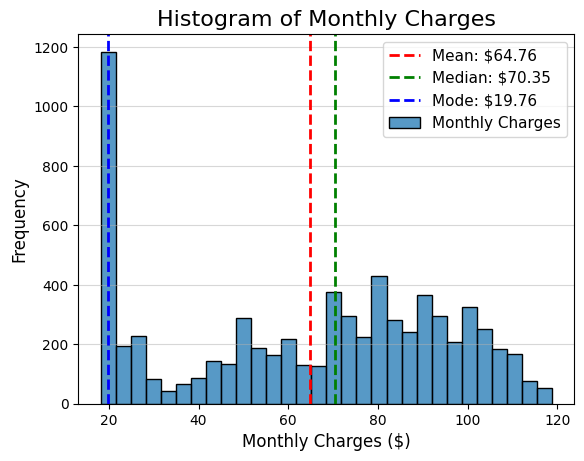

In [23]:
plt.figure()

sns.histplot(churn['MonthlyCharges'], bins=30, label='Monthly Charges')

plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: ${mode_val:.2f}')

plt.title('Histogram of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.5)

plt.show()

# 데이터의 분포 확인하기
*   상자수염그림
*   바이올린 플롯
*   스웜 플롯

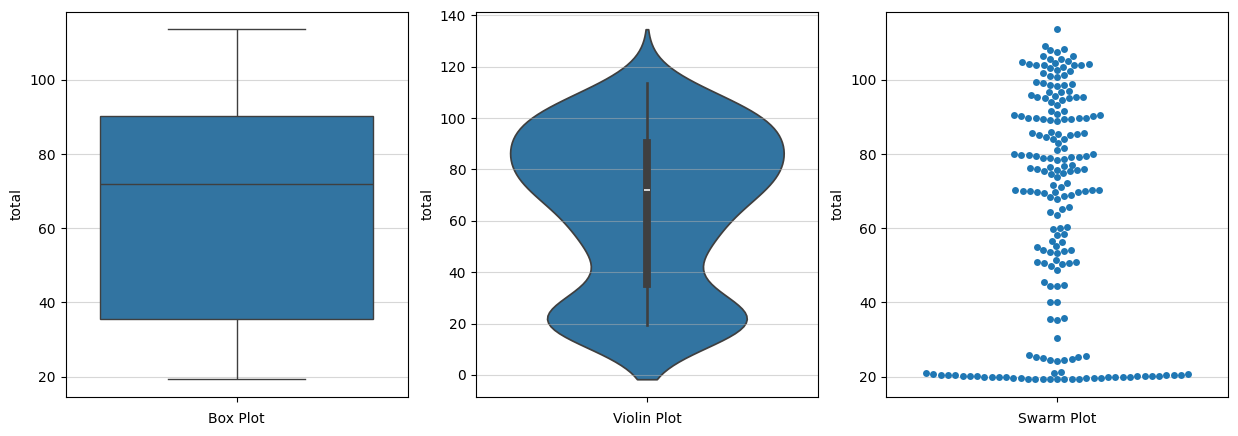

In [27]:
taxis_sample = churn['MonthlyCharges'].sample(n=200, random_state=42)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(taxis_sample)
plt.xlabel('Box Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 3, 2)
sns.violinplot(taxis_sample)
plt.xlabel('Violin Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.subplot(1, 3, 3)
sns.swarmplot(taxis_sample)
plt.xlabel('Swarm Plot')
plt.ylabel('total')
plt.grid(axis='y', alpha=0.5)

plt.show()

# 신뢰구간 구하기

In [32]:
# 모집단 생성: MonthlyCharges
population = churn['MonthlyCharges']
population_mean = np.mean(population)
population_std = np.std(population, ddof=0)
print(f"모집단 평균: {population_mean:.2f}, 모집단 표준편차: {population_std:.2f}\n")

모집단 평균: 64.76, 모집단 표준편차: 30.09



n=100: 표본평균=66.34, 95% CI=(60.44, 72.24)
n=300: 표본평균=64.97, 95% CI=(61.56, 68.37)
n=1000: 표본평균=64.02, 95% CI=(62.15, 65.88)


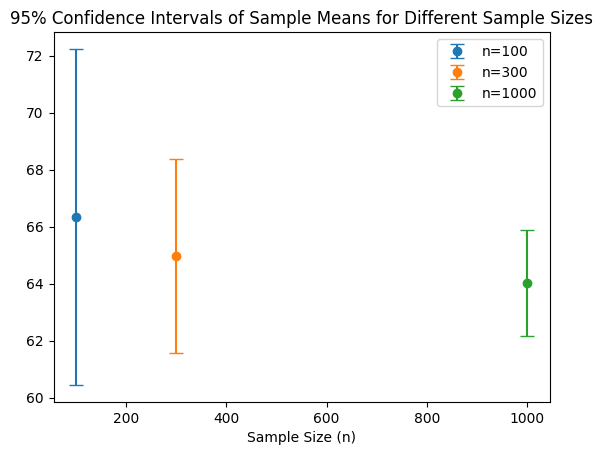

In [53]:
# 표본 추출
# 표본 크기 리스트
sample_sizes = [100, 300, 1000]

# 결과 저장용
results = []

# 표본 크기별 신뢰구간 계산
np.random.seed(42)
for n in sample_sizes:
    sample = np.random.choice(population, size=n)
    sample_mean = np.mean(sample)     # 표본 평균

    z_crit = norm.ppf((1 + 0.95) / 2)   # 95% 신뢰수준에서 z 임계값
    se = population_std / np.sqrt(n)  # 표준오차 (모집단 표준편차 사용)
    margin = z_crit * se
    ci_lower = sample_mean - margin
    ci_upper = sample_mean + margin

    results.append((n, sample_mean, ci_lower, ci_upper))

    # 신뢰구간 표시
    plt.errorbar(x=n, y=sample_mean, yerr=margin, fmt='o', capsize=5, label=f'n={n}')

    print(f"n={n}: 표본평균={sample_mean:.2f}, 95% CI=({ci_lower:.2f}, {ci_upper:.2f})")

plt.title('95% Confidence Intervals of Sample Means for Different Sample Sizes')
plt.xlabel('Sample Size (n)')
plt.legend()
plt.show()